In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
ls data

crop/
data_10000_norm.npz
data_100_100_norm.npy
data_pca_50_y_mean.pickle.npz
dataframe_images_100x100.pickle
dataset/
dog.jpg
fb.jpg
male_01.png
opencv_haarcascade_frontalface_default.xml at master · opencv_opencv.html
opencv_haarcascade_frontalface_default.xml at master · opencv_opencv_files/
pca_50.pickle
wiki_crop/


In [5]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [7]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1466, 50), (367, 50), (1466,), (367,))

# Training a Machine Learning Model

In [10]:
from sklearn.svm import SVC

In [20]:
model = SVC(C=1.0,kernel = 'rbf', gamma = 0.01, probability = True)

In [21]:
model.fit(x_train,y_train)
print("model trained successfully")

model trained successfully


In [22]:
model.score(x_train, y_train)

0.8840381991814461

In [23]:
model.score(x_test, y_test)

0.8201634877384196

# Model Evaluation
- Confusion Matrix
- Classification Report
- Kappa Score
- ROC and AUC (probability)

In [24]:
from sklearn import metrics


In [25]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [29]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)), axis=0)

cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)), axis=1)
cm

array([[100,  44, 144],
       [ 22, 201, 223],
       [122, 245, 367]])

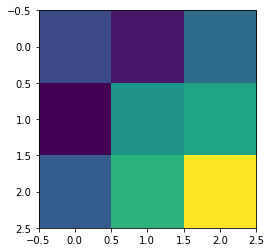

In [30]:
plt.imshow(cm)

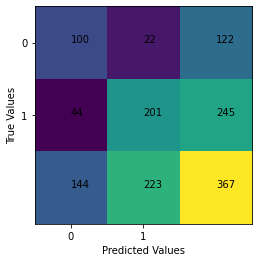

In [36]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
    
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [37]:
# Classification report
cr = metrics.classification_report(y_test, y_pred, target_names=['male','female'], output_dict = True)

In [38]:
cr

{'male': {'precision': 0.819672131147541,
  'recall': 0.6944444444444444,
  'f1-score': 0.7518796992481204,
  'support': 144},
 'female': {'precision': 0.8204081632653061,
  'recall': 0.9013452914798207,
  'f1-score': 0.8589743589743589,
  'support': 223},
 'accuracy': 0.8201634877384196,
 'macro avg': {'precision': 0.8200401472064236,
  'recall': 0.7978948679621325,
  'f1-score': 0.8054270291112396,
  'support': 367},
 'weighted avg': {'precision': 0.8201193659220959,
  'recall': 0.8201634877384196,
  'f1-score': 0.8169535660572517,
  'support': 367}}

In [40]:
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.819672,0.694444,0.751880,144.000000
female,0.820408,0.901345,0.858974,223.000000
accuracy,0.820163,0.820163,0.820163,0.820163
macro avg,0.820040,0.797895,0.805427,367.000000
weighted avg,0.820119,0.820163,0.816954,367.000000


In [41]:
# Kappa
metrics.cohen_kappa_score(y_test, y_pred)

0.612361168901834

# ROC and AUC

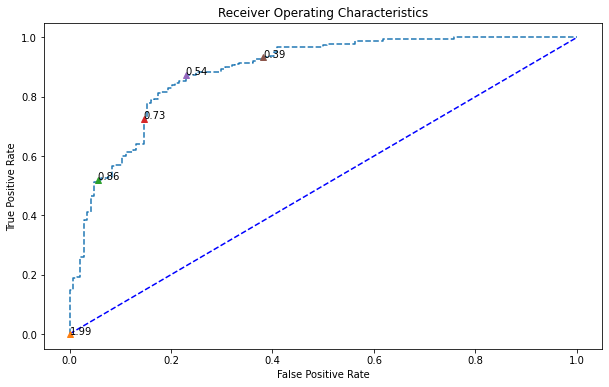

In [46]:
# roc for female
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)

plt.figure(figsize=(10,6))

plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'b--')

for i in range(0, len(thresh), 20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i], tpr[i],"%0.2f"%thresh[i])
    
plt.legend(["AUC Score = %0.2f"%a])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()